# Working with folders

In this notebook I want to explore how to work with a folder of files using Python.

First, lets figure out how to identify the current directory. This can be done easily using Python's `os` module (Miscellaneous operating system interfaces).

In [2]:
import os

os.getcwd()

'C:\\Users\\ptudor\\Documents\\GitHub\\python-basics'

That works ok. Next, how do we see all entries in a particular directory? For the following work, this [resource](https://realpython.com/working-with-files-in-python/) is written nicely. In Python 3.5 and newer, we can use `os.scandir()` (returns an interator). For older versions of Python, `os.listdir()` can be used instead (returns a list). Another option is to use `pathlib.Path.iterdir()`.

In [5]:
# store current directory
my_directory = os.getcwd()

with os.scandir(my_directory) as entries:
    for entry in entries:
        print(entry.name)

.git
.gitattributes
.ipynb_checkpoints
Anaconda Prompt and Environments.ipynb
Jupyer Notebook Shortcuts.ipynb
Opening, reading and writing files.ipynb
pictures-for-notebooks
README.md
Term Definitions.ipynb
test-folder-with-csv-files
Working with folders.ipynb


This method returns everything in the directory, i.e. files, and other objects like sub-directories. If we only want to print out files, then we can do the following - 

In [7]:
with os.scandir(my_directory) as entries:
    for entry in entries:
        if entry.is_file():
            print(entry.name)

.gitattributes
Anaconda Prompt and Environments.ipynb
Jupyer Notebook Shortcuts.ipynb
Opening, reading and writing files.ipynb
README.md
Term Definitions.ipynb
Working with folders.ipynb


If we want to print sub-directories instead of files, then we can swap out `is_file()` for `is_dir()` like so -

In [9]:
with os.scandir(my_directory) as entries:
    for entry in entries:
        if entry.is_dir():
            print(entry.name)

.git
.ipynb_checkpoints
pictures-for-notebooks
test-folder-with-csv-files


## Filename pattern matching

There are some methods available to help search for files that match a particular pattern -
- `startswith()` and `endswith()` string methods
- `fnmatch.fnmatch()`
- `glob.glob()`
- `pathlib.Path.glob()`

In [12]:
# string methods

# Get .ipynb files
for f_name in os.listdir(my_directory): # note I'm using listdir() here rather than scandir()
    if f_name.endswith('.ipynb'):
        print(f_name)

Anaconda Prompt and Environments.ipynb
Jupyer Notebook Shortcuts.ipynb
Opening, reading and writing files.ipynb
Term Definitions.ipynb
Working with folders.ipynb


In [13]:
# using fnmatch()

import fnmatch

for file_name in os.listdir(my_directory):
    if fnmatch.fnmatch(file_name, '*.ipynb'):
        print(file_name)

Anaconda Prompt and Environments.ipynb
Jupyer Notebook Shortcuts.ipynb
Opening, reading and writing files.ipynb
Term Definitions.ipynb
Working with folders.ipynb


In [16]:
# more advanced example

# use sub-directory for this example
my_subdir = 'C:\\Users\\ptudor\\Documents\\GitHub\\python-basics\\test-folder-with-csv-files'

for filename in os.listdir(my_subdir):
    # '*' indicates any string between other values
    if fnmatch.fnmatch(filename, 'weights-*.txt'):
        print(filename)

weights-2020-01-01.txt
weights-2020-01-02.txt
weights-2020-01-03.txt
weights-2020-01-04.txt


In [19]:
# using glob

import glob

glob.glob('*.ipynb')

['Anaconda Prompt and Environments.ipynb',
 'Jupyer Notebook Shortcuts.ipynb',
 'Opening, reading and writing files.ipynb',
 'Term Definitions.ipynb',
 'Working with folders.ipynb']

Glob can work recursively in subdirectories as well -

In [26]:
# **/ allows for nabigation of multiple directory levels
for file in glob.iglob('**/*.txt', recursive = True):
    print(file)

test-folder-with-csv-files\weights-2020-01-01.txt
test-folder-with-csv-files\weights-2020-01-02.txt
test-folder-with-csv-files\weights-2020-01-03.txt
test-folder-with-csv-files\weights-2020-01-04.txt


`iglob` returns an iterator, whereas `glob` returns a list.

## Traversing directories

`os.walk()` allows you to navigate a directory tree. It defaults to traversing a directory from the top down.

In [33]:
for dirpath, dirnames, files in os.walk(my_directory):
    print(f'Found directory: {dirpath}')
    for file_name in files:
            print(file_name)

Found directory: C:\Users\ptudor\Documents\GitHub\python-basics
.gitattributes
Anaconda Prompt and Environments.ipynb
Jupyer Notebook Shortcuts.ipynb
Opening, reading and writing files.ipynb
README.md
Term Definitions.ipynb
Working with folders.ipynb
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\.git
COMMIT_EDITMSG
config
description
FETCH_HEAD
HEAD
index
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\.git\hooks
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-merge-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update.sample
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\.git\info
exclude
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\.git\logs
HEAD
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\.git\logs\refs
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\.gi

That's a lot of files! Additional steps like those shown above can be added to focus on the files we're interested in. For the following example I used the top solution from [here](https://stackoverflow.com/questions/19859840/excluding-directories-in-os-walk).

In [39]:
# check directory names to decide which we may want to remove
# for dirpath, dirnames, files in os.walk(my_directory):
#     print(f'Found directory names: {dirnames}')

In [38]:
# put exclusions in a set
exclude = {'.git', '.ipynb_checkpoints'}

for dirpath, dirnames, files in os.walk(my_directory):

    # remove excluded directory names from the walk
    dirnames[:] = [d for d in dirnames if d not in exclude]
    print(f'Found directory: {dirpath}')
    for file_name in files:
        print(file_name)

Found directory: C:\Users\ptudor\Documents\GitHub\python-basics
.gitattributes
Anaconda Prompt and Environments.ipynb
Jupyer Notebook Shortcuts.ipynb
Opening, reading and writing files.ipynb
README.md
Term Definitions.ipynb
Working with folders.ipynb
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\pictures-for-notebooks
current-environment.png
Found directory: C:\Users\ptudor\Documents\GitHub\python-basics\test-folder-with-csv-files
weights-2020-01-01.txt
weights-2020-01-02.txt
weights-2020-01-03.txt
weights-2020-01-04.txt


## Reading multiple files

Now I understand the above, I'm ready to put together some code which looks through a directory, identifies files of a certain type, reads them into python, and appends them into a table.

In [81]:
# using pandas
import pandas as pd

# identify the directory
my_directory = os.getcwd()

# create an empty list for file names
my_files = []

# add files of interest to the list
for dirpath, dirnames, files in os.walk(my_directory):
    for file_name in files:
        if fnmatch.fnmatch(file_name, 'weights*.txt'):
            my_file = dirpath + '\\' + file_name
            my_files.append(my_file)

# print(my_files)

# create an empty list for file content
my_content = []

# append individual files into the content list
for filename in my_files:
    df = pd.read_csv(filename, sep = '|', 
                     index_col = None, 
                     parse_dates = ['Date'],
                     header = 0,
                     names = ['Date', 'PersonID', 'FirstName', 'Age', 'Weight'])
    my_content.append(df)
    
# concatenate the objects in the list
# axis = 0 instructs to concatenate by index, rather than columns
my_data = pd.concat(my_content, axis = 0, ignore_index = True)

In [76]:
my_data

,Date,PersonID,FirstName,Age,Weight
0,2020-01-01,1,Tom,32,80
1,2020-01-01,2,Matt A,33,78
2,2020-01-01,3,Alex,31,90
3,2020-01-01,4,Matt P,32,76
4,2020-01-01,5,Pat,32,70
5,2020-01-02,1,Tom,32,79
6,2020-01-02,2,Matt A,33,78
7,2020-01-02,3,Alex,31,91
8,2020-01-02,4,Matt P,32,77
9,2020-01-02,5,Pat,32,71


<AxesSubplot:xlabel='Date', ylabel='Weight'>

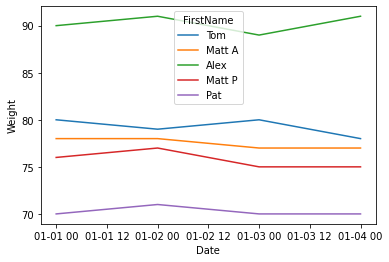

In [79]:
# plot the data :)

import seaborn as sns

sns.lineplot(data = my_data, x = 'Date', y = 'Weight', hue = 'FirstName')

In [19]:
# not using pandas - this writes a new file compiled from individual datasets

import os
import glob
import fnmatch

# identify the directory
my_directory = os.getcwd()

# create an empty list for file names
my_files = []

# add files of interest to the list
for dirpath, dirnames, files in os.walk(my_directory):
    for file_name in files:
        if fnmatch.fnmatch(file_name, 'weights*.txt'):
            my_file = dirpath + '\\' + file_name
            my_files.append(my_file)

cols = ['Date', 'PersonID', 'FirstName', 'Age', 'Weight']
with open("weights_alldays.txt", "w") as out:
    # join the column names together with a comma between and then start a new line
    # "%s" % - substitutes in the joined columns with commas 
    out.write("%s\n" % "|".join(cols))
    for file in my_files:
        with open(file) as f:
            for idx, line in enumerate(f):
                if idx > 0:
                    out.write(line)

In [20]:
# remove file (optional)

# check if the file exists
if os.path.exists('weights_alldays.txt'):
    # delete the file if so -
    os.remove('weights_alldays.txt')
    print("File removed!")
else:
    # return some really helpful text
    print("Nope! This file doesn't exist!")

File removed!
